In [9]:
import pandas as pd

df1 = pd.read_csv('INFLUD20-01-05-2023.csv', sep=';', encoding='utf8')
df2 = pd.read_csv('INFLUD21-01-05-2023.csv', sep=';', encoding='utf8')

df = pd.concat([df1, df2])

df.head()

/tmp/ipykernel_10186/2720694534.py:3: DtypeWarning: Columns (15,59,61,62,63,91,93,105,114,116,117,118,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('INFLUD20-01-05-2023.csv', sep=';', encoding='utf8')
/tmp/ipykernel_10186/2720694534.py:4: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('INFLUD21-01-05-2023.csv', sep=';', encoding='utf8')


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,24/01/2020,4,22/01/2020,4,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,HOSPITAL E P S DA CRIANCA DA ZONA OESTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28/02/2020,9,25/02/2020,9,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,HOSPITAL E PRONTO SOCORRO DA ZONA NORTE DELPHI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/03/2020,12,11/03/2020,11,ES,COLATINA,1509.0,COLATINA,320150,HOSPITAL E MATERNIDADE SILVIO AVIDOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23/03/2020,13,15/03/2020,12,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANCTA MAGGIORE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20/03/2020,12,18/03/2020,12,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Classificacao para covid.
df = df[df['CLASSI_FIN'] == 5]


# df.to_csv('dani_eh_fodona.csv', index=False)

In [11]:
df['casos'] = df.index
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format='%d/%m/%Y')

df = df.sort_values(by='DT_NOTIFIC')
count_df = df[['DT_NOTIFIC', 'ID_MUNICIP', 'casos']].groupby(by=['DT_NOTIFIC', 'ID_MUNICIP']).count().reset_index()

# Somar valores que já vimos
count_df['casos_acumulados'] = count_df.groupby(by=['ID_MUNICIP']).casos.cumsum()

count_df.sort_values(by=['ID_MUNICIP', 'DT_NOTIFIC'], ascending=True)

print(count_df[count_df['ID_MUNICIP'] == 'PARACATU'])

       DT_NOTIFIC ID_MUNICIP  casos  casos_acumulados
1318   2020-03-31   PARACATU      1                 1
5493   2020-04-25   PARACATU      1                 2
16176  2020-05-25   PARACATU      2                 4
25790  2020-06-15   PARACATU      1                 5
26970  2020-06-17   PARACATU      2                 7
...           ...        ...    ...               ...
332658 2021-12-05   PARACATU      1               911
334153 2021-12-14   PARACATU      1               912
334337 2021-12-15   PARACATU      1               913
334679 2021-12-17   PARACATU      1               914
334814 2021-12-18   PARACATU      1               915

[324 rows x 4 columns]


In [12]:
count_df.isna().sum()

DT_NOTIFIC          0
ID_MUNICIP          0
casos               0
casos_acumulados    0
dtype: int64

In [13]:
# preencher os dados vazios como 0.
count_df['casos_acumulados'].fillna(0)
count_df.isna().sum()

DT_NOTIFIC          0
ID_MUNICIP          0
casos               0
casos_acumulados    0
dtype: int64

2020-03-31 00:00:00
2020-07-31 00:00:00
24


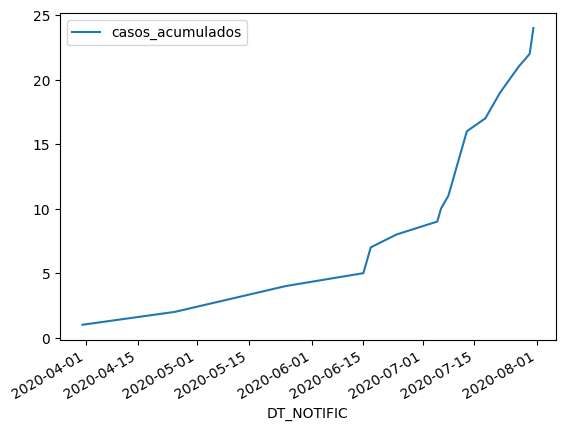

In [17]:
paracatu_df = count_df[count_df['ID_MUNICIP'] == 'PARACATU']
paracatu_df = paracatu_df[paracatu_df['DT_NOTIFIC'] < '2020-08-01']
paracatu_df.plot(x='DT_NOTIFIC', y='casos_acumulados')
print(min(paracatu_df['DT_NOTIFIC']))
print(max(paracatu_df['DT_NOTIFIC']))
print(max(paracatu_df['casos_acumulados']))